In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pyplot
%matplotlib inLine
from datetime import datetime


In [4]:
import statsmodels.api as sm

In [9]:
df = sm.datasets.macrodata.load_pandas().data

In [10]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [11]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [12]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [13]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [14]:
df.index = index

In [15]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

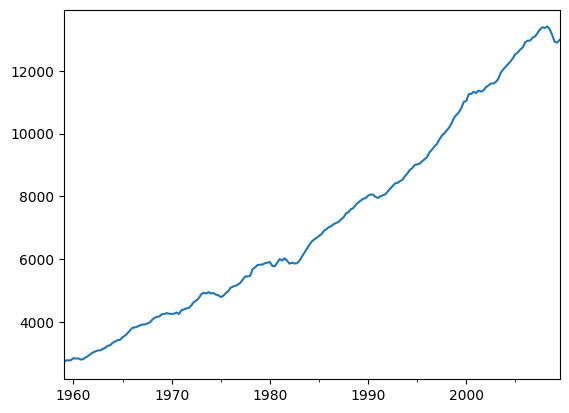

In [16]:
df['realgdp'].plot()

In [20]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [22]:
df['trend'] = gdp_trend

<Axes: >

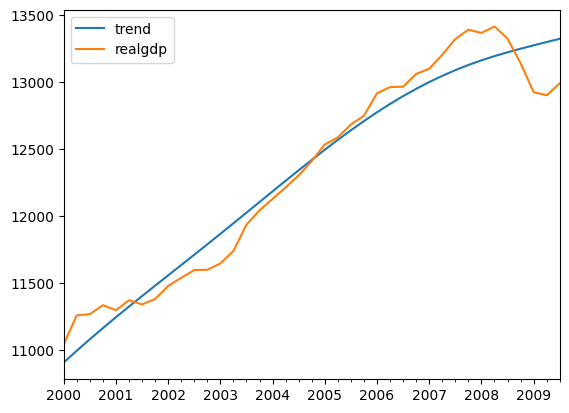

In [25]:
df[['trend', 'realgdp']]['2000-03-31':].plot()

In [26]:
type(result)

tuple

EMWA (Exponetial Moving Weight Average)

In [41]:
airline = pd.read_csv('AirPassengers.csv', index_col='Month')

In [42]:
airline.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


<Axes: xlabel='Month'>

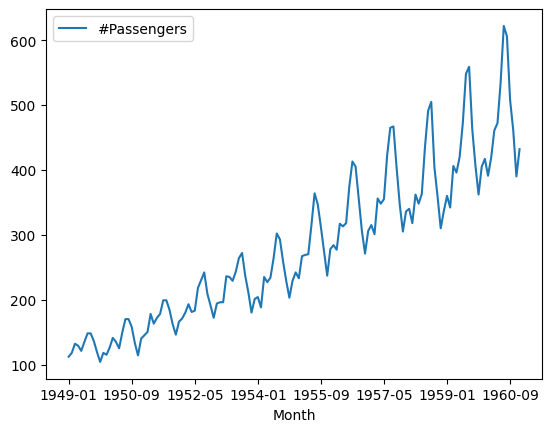

In [43]:
airline.plot()

In [44]:
airline.dropna(inplace=True)

In [45]:
airline.index = pd.to_datetime(airline.index)

In [46]:
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
result = seasonal_decompose(airline['#Passengers'], model='multiplicative')

In [49]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

<Axes: xlabel='Month'>

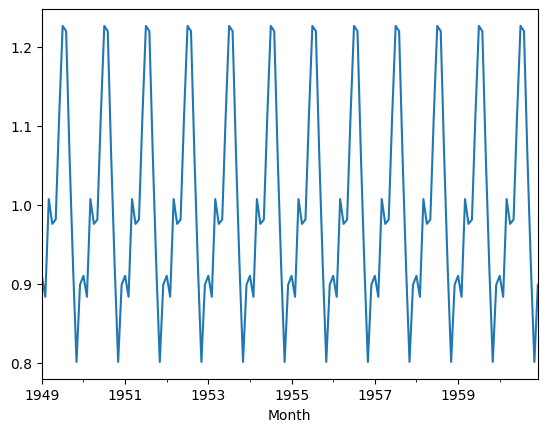

In [50]:
result.seasonal.plot()

In [51]:
result = seasonal_decompose(airline['#Passengers'], model='additive')

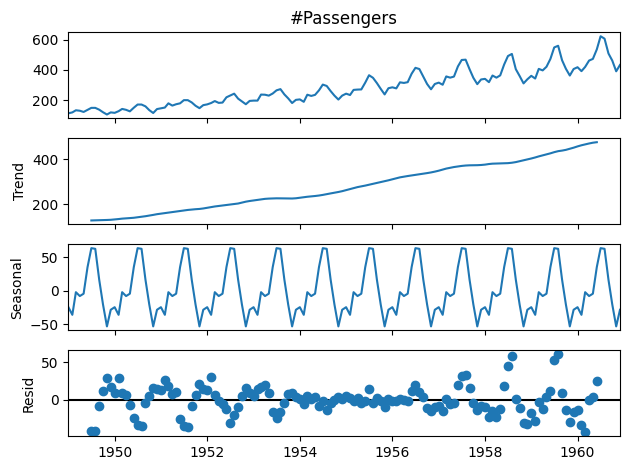

In [53]:
fig = result.plot()

In [55]:
df = pd.read_csv('monthly-milk-production-pounds.csv')

In [56]:
df

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [57]:
df.columns = ['Month', 'Milk in pounds per cow']

In [58]:
df.head()

,Month,Milk in pounds per cow
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [59]:
df.tail()

,Month,Milk in pounds per cow
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [60]:
df['Month'] = pd.to_datetime(df['Month'])

In [61]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [62]:
df.index

RangeIndex(start=0, stop=168, step=1)

In [63]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Month,168,1968-12-15 16:17:08.571428572,1962-01-01 00:00:00,1965-06-23 12:00:00,1968-12-16 12:00:00,1972-06-08 12:00:00,1975-12-01 00:00:00,NaN
Milk in pounds per cow,168.0,754.708333,553.0,677.75,761.0,824.5,969.0,102.204524


<Axes: >

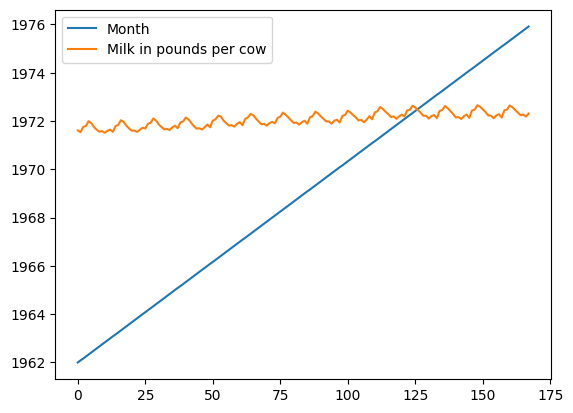

In [64]:
df.plot()

In [65]:
time_series = df['Milk in pounds per cow']

In [66]:
type(time_series)

pandas.core.series.Series

<Axes: >

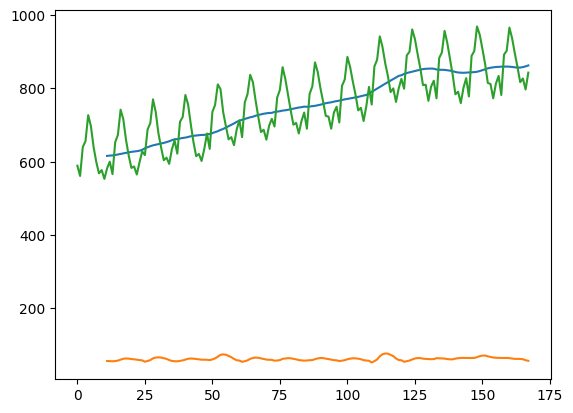

In [70]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')  # 12 month rolling mean
time_series.rolling(12).std().plot(label='12 Month Rolling Std')  # 12 month rolling std
time_series.plot()

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [73]:
time_series.index = pd.date_range(start='1962-01-01', periods=len(time_series), freq='MS')
decomp = seasonal_decompose(time_series)

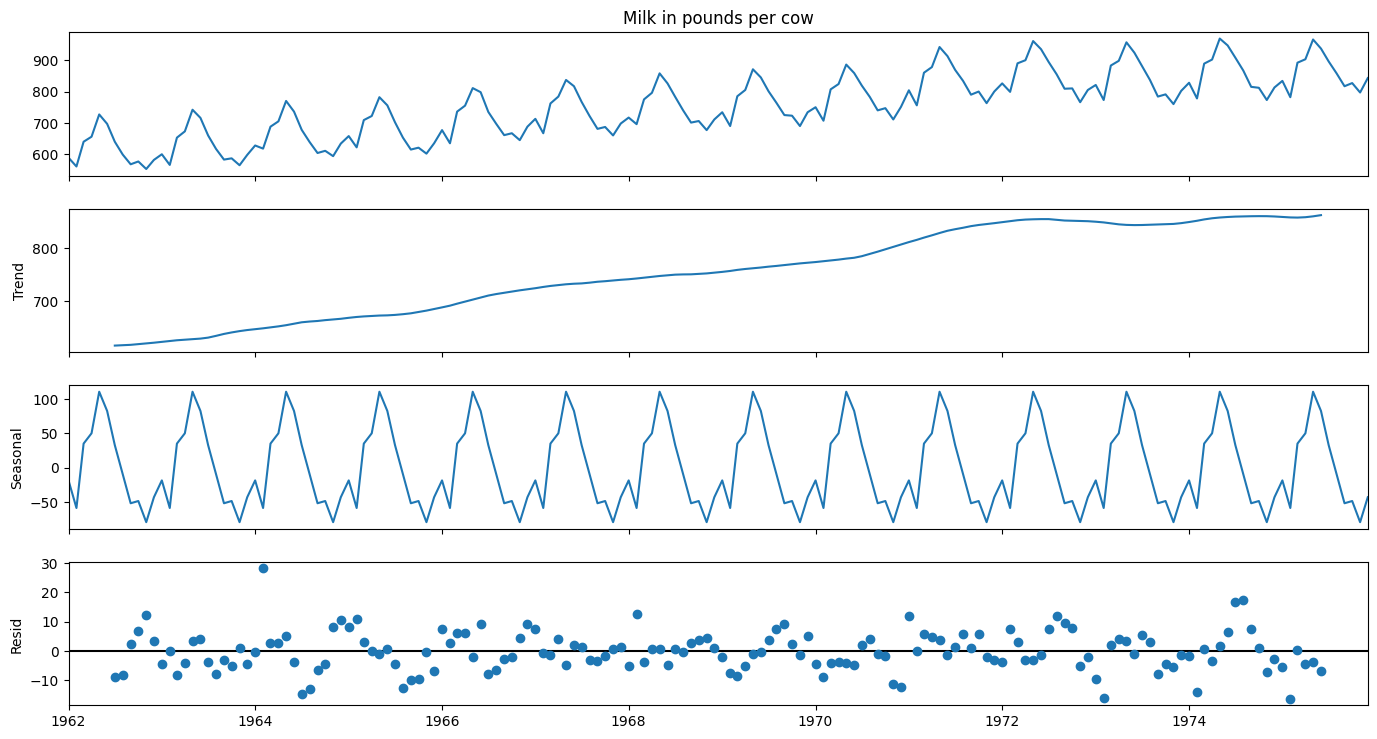

In [76]:
fig = decomp.plot()
fig.set_size_inches(15, 8)

In [77]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [78]:
from statsmodels.tsa.stattools import adfuller

In [79]:
result = adfuller(df['Milk in pounds per cow'])

In [80]:
# H0: Data has a unit root and is non-stationary
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    
    # zip() function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    
    # result[1] is the p-value   
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root and is stationary')
    # result[1] is the p-value
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root and is non-stationary')

In [81]:
adf_check(df['Milk in pounds per cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.3038115874221345
p-value : 0.6274267086030293
# of lags : 13
Num of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [88]:
df['First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)   # shift(1) shifts the data by 1

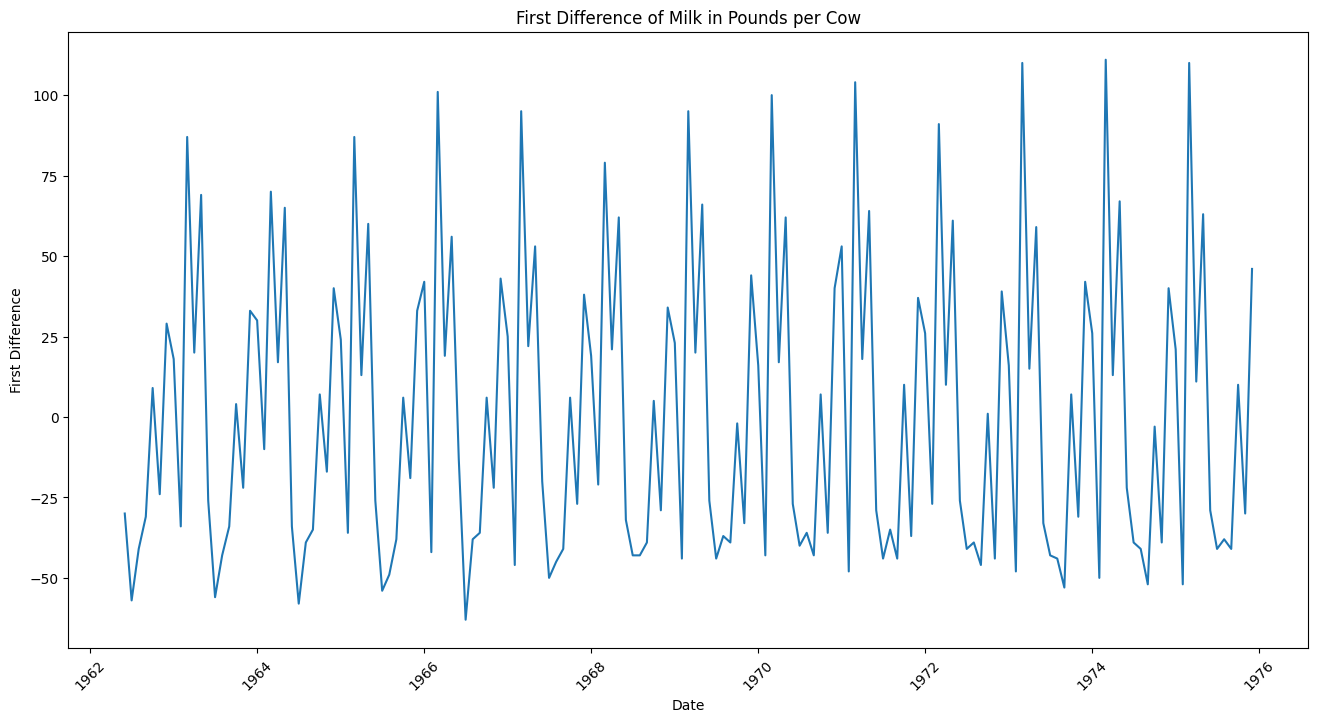

In [ ]:
import matplotlib.pyplot as plt

# the 'Month' column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])

# The 'Month' column is set as the index
df.set_index('Month', inplace=True)

# Drop NaN values for the 'First Difference' column
df = df.dropna(subset=['First Difference'])

# Plot the first difference using pyplot
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['First Difference'])  # Use the index (which is Date) for x-axis
plt.title('First Difference of Milk in Pounds per Cow')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('First Difference')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()  # Show the plot


In [96]:

adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.006272015802674
p-value : 0.03431280991344105
# of lags : 14
Num of Observations used : 148
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [97]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [98]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.142505121109982
p-value : 2.2333037487733756e-26
# of lags : 11
Num of Observations used : 150
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


<Axes: xlabel='Month'>

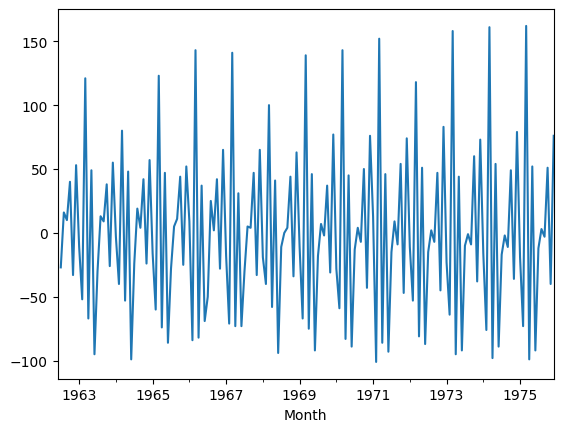

In [99]:
df['Second Difference'].plot()

In [100]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)# shift(12) shifts the data by 12

<Axes: xlabel='Month'>

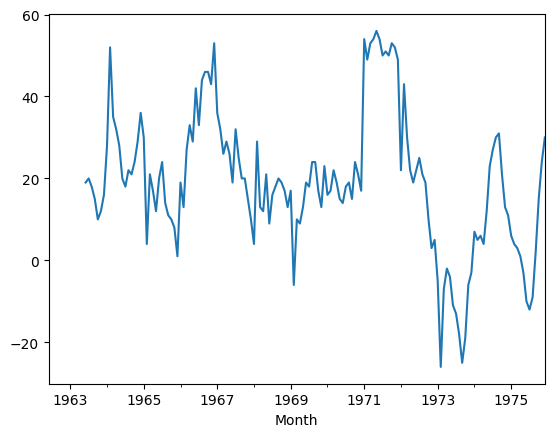

In [101]:
df['Seasonal Difference'].plot()

In [102]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.2222567978164243
p-value : 0.19826691132418528
# of lags : 12
Num of Observations used : 138
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [103]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)# shift(12) shifts the data by 12

<Axes: xlabel='Month'>

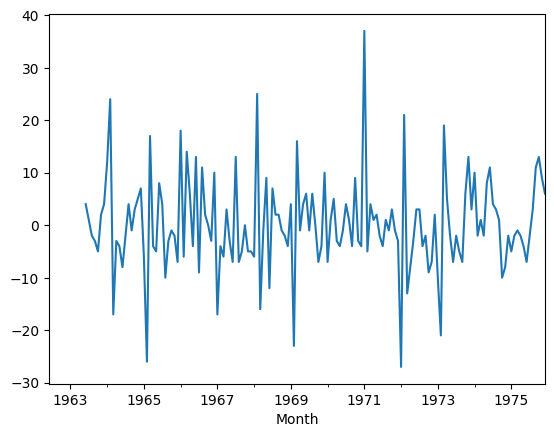

In [104]:
df['Seasonal First Difference'].plot()

In [105]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -5.0301795127463365
p-value : 1.933502666684706e-05
# of lags : 11
Num of Observations used : 139
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

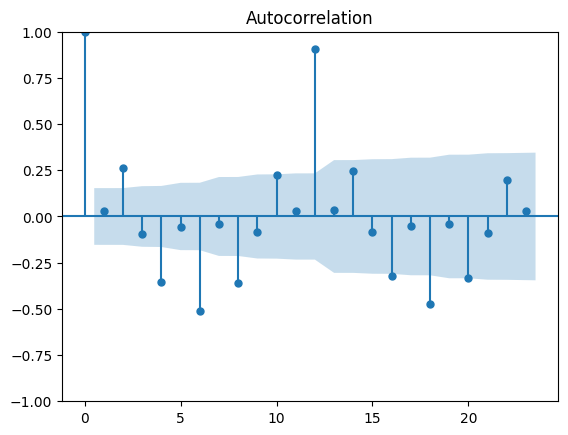

In [107]:
fig_first = plot_acf(df['First Difference'].dropna())

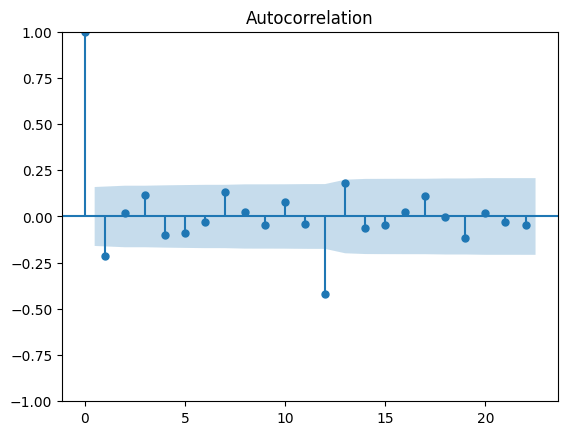

In [108]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [109]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

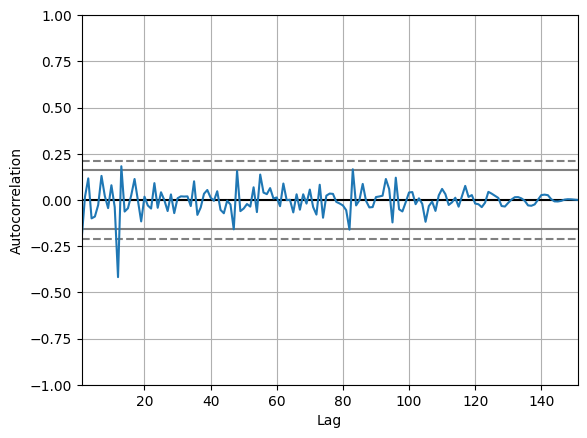

In [110]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

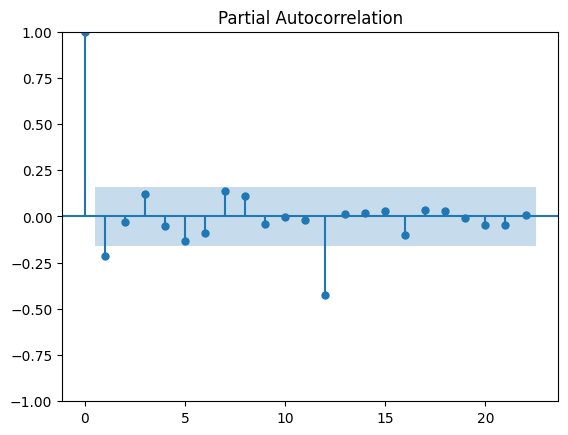

In [111]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

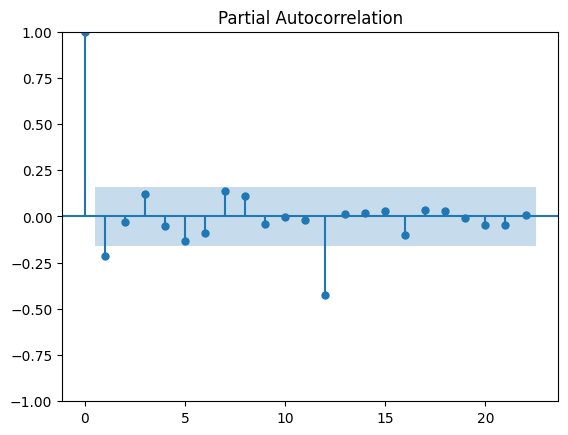

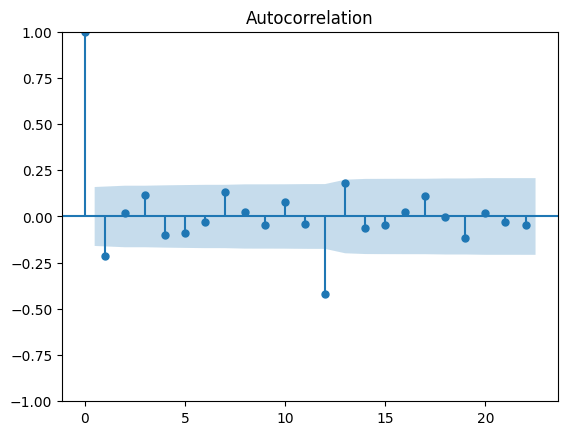

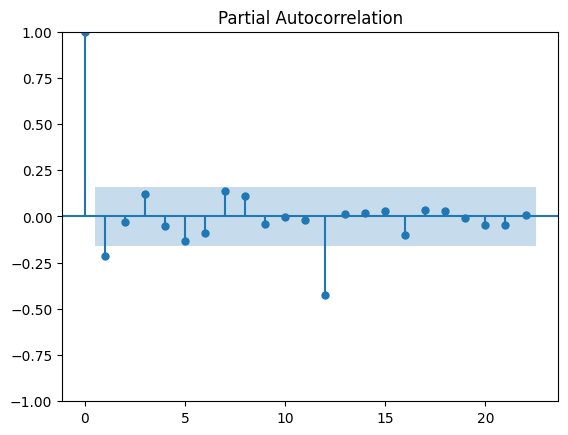

In [113]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

In [114]:
from statsmodels.tsa.arima_model import ARIMA

In [118]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))# order=(p, d, q) and seasonal_order(P, D, Q, S)

c:\Users\allif\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\allif\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [119]:
results = model.fit() # Fit the model

In [120]:
print(results.summary())    # Summary of the model

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  163
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -518.535
Date:                              Sun, 29 Dec 2024   AIC                           1043.069
Time:                                      22:51:50   BIC                           1052.101
Sample:                                  06-01-1962   HQIC                          1046.739
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0221      0.107     -0.206      0.837      -0.233       0.188
ma.S.L12      -0.61

<Axes: xlabel='Month'>

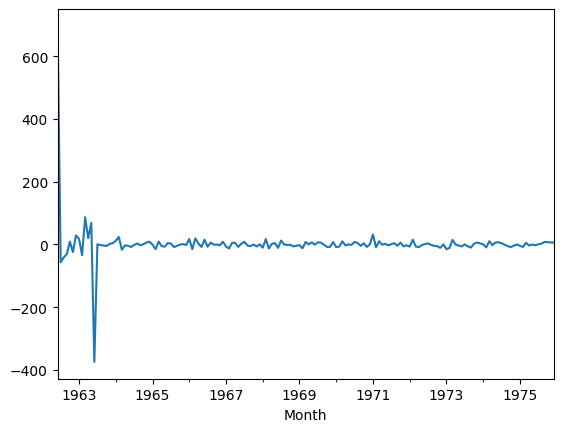

In [121]:
results.resid.plot()

<Axes: ylabel='Density'>

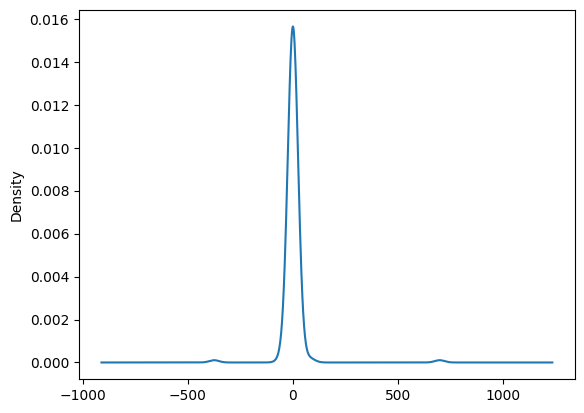

In [122]:
results.resid.plot(kind='kde') # Kernel Density Estimation plot

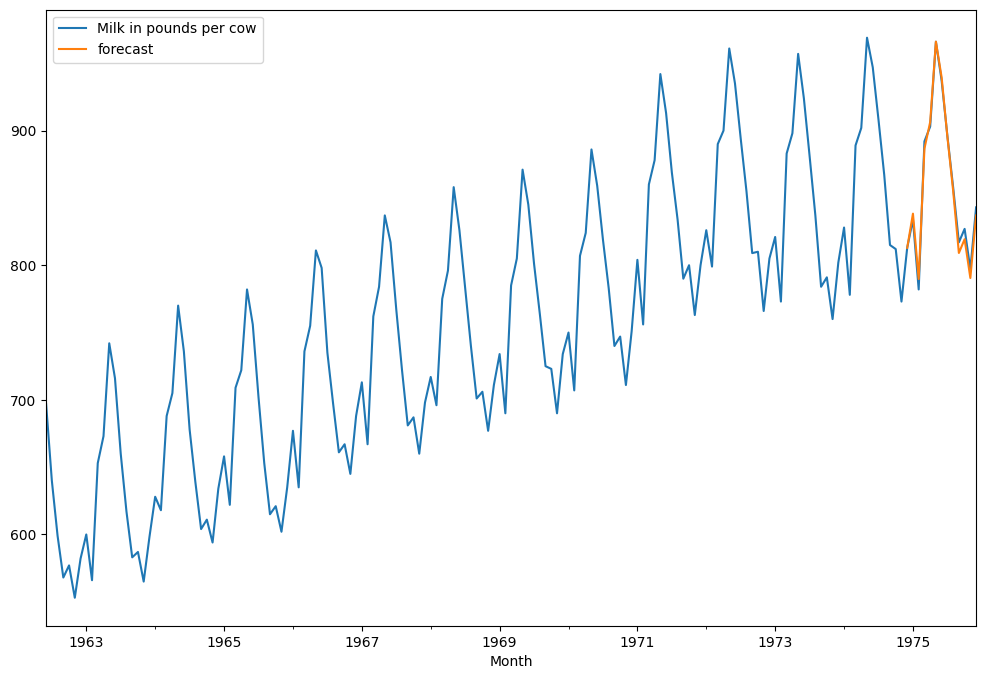

In [124]:
df['forecast'] = results.predict(start=150, end=168)  # Forecasting the data
df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8))  # Plotting the data
plt.show()  # Show the plot


In [125]:
#to forecast the future
from pandas.tseries.offsets import DateOffset



In [126]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 24)]# Forecasting the future dates for the next 24 months


In [127]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [128]:
 # Creating a new dataframe with the future dates
future_df = pd.DataFrame(index=future_dates, columns=df.columns)


In [129]:
future_df

,Milk in pounds per cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
final_df = pd.concat([df, future_df])  # Concatenating the original dataframe with the future dataframe

C:\Users\allif\AppData\Local\Temp\ipykernel_18512\579249514.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([df, future_df])  # Concatenating the original dataframe with the future dataframe


In [131]:
final_df.head()

,Milk in pounds per cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-06-01,697,-30.0,NaN,NaN,NaN,NaN
1962-07-01,640,-57.0,-27.0,NaN,NaN,NaN
1962-08-01,599,-41.0,16.0,NaN,NaN,NaN
1962-09-01,568,-31.0,10.0,NaN,NaN,NaN
1962-10-01,577,9.0,40.0,NaN,NaN,NaN


In [132]:
final_df.tail()

,Milk in pounds per cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
final_df['forecast'] = results.predict(start=168, end=192)  # Forecasting the future data

In [134]:
final_df.tail()

,Milk in pounds per cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.806367
1977-08-01,NaN,NaN,NaN,NaN,NaN,912.202680
1977-09-01,NaN,NaN,NaN,NaN,NaN,866.236042
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.367810
1977-11-01,NaN,NaN,NaN,NaN,NaN,837.293630


<Axes: >

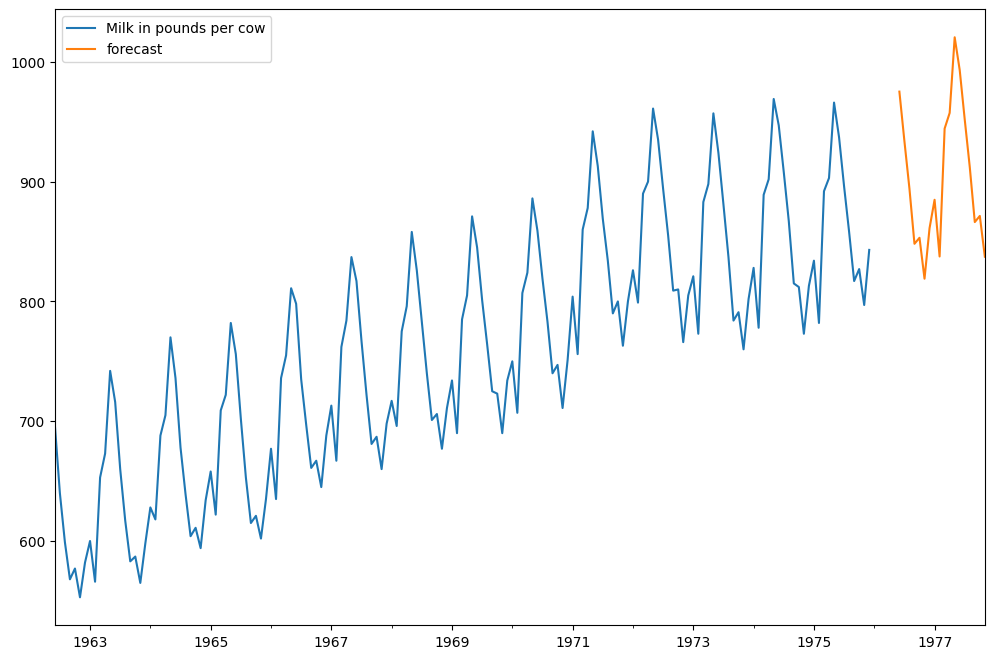

In [135]:
#plotting the forecasted data
final_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8))